# CSE 627 Project 1
### House Price: Advanced Regression Techniques 
### By Sooyeong Lim, Jason Zhao




# Introduction

* Why this competition?

 The Kaggle competition we chose is "House Price: Advanced Regression Techniques". We selected this competition because it satisfies the criterion of good project. Below are few reasons of justification.
 
 Firstly, we can practice a lot of feature engineering by doing this project. Feature engineering is very important in Data Science. This dataset contains a lot of features(79) with both quantitative variable and categorical variable. Also, there are many missing variables in the dataset and we can practice imputation skills as well. 
 
 Second, This project allow us to use the model we learned from class room including Regularized model and Neural Network based model and we think that it is a good idea to do hands on examples. We went further form this baseline model by adding some Ensnblem model or morden technique- Boosting model



* Project Timeline and Plan

 Fit the rough model and had a meeting with Dr. Femiani. After the first meeting, we verified that our approach valid and came up alternative ways to fit the model- NN based model fitting. But it turned out that there is some problem in the feature Engineering. Date and meeting time




* Executive Conclusion 
 The fittied model suggest that ~ have a best performance and we ended on 
 First placement-> Second Placement -> Thir Place ment

### Index 


* Exploratory Data Analysis
* Feature Engineering
* Modeling 
**1. Regularized model, 2. XGBoost, 3. Neural Network Based Model
* Results **Provide table of resutls
* Limitations/Recommendations
* Reference/Resource

### Exploratory Data Analysis

[1] Exploratory Data analysis is giving a direction of further analysis. We checked that the overall trend of data distribution and relationship between predictors and response variables and setted properdiretion for the feature engineerning and modeling.

In [4]:
# Import packages for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Import train & test dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
# How many distinct number of features?
# How many observations?
# Respose variable?

After importing train&test dataset, we are going to answer following questions to get to know about the problem much better- Feature:0. How many observations do we have? 1. How many number of features in the datset and how many categorical& quantitative features in the data? 2. How dose it look like the response varaible?

In [6]:
# How many observations do we have? what is concern? 
len(train.index)
len(test.index)
# We have almost equal size of train and test dataset 

1459

In [7]:
# List of Columns and except SalePrice this 
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Correlation plot and scatter plot between ~ all features

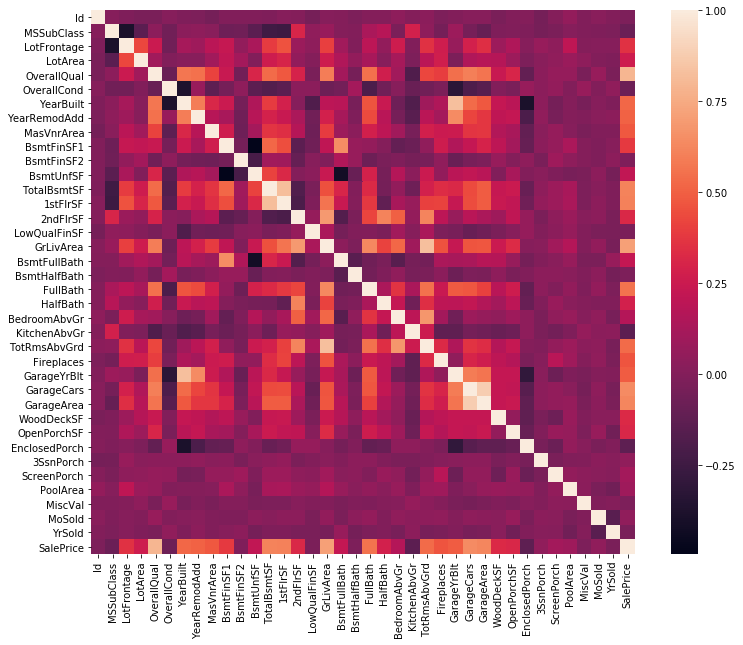

In [8]:
cor_mat=train.corr()
f,ax=plt.subplots(figsize=(13,10))
sns.heatmap(cor_mat,vmax=1,square=True)

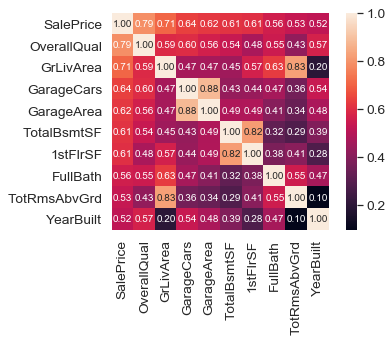

In [9]:
#Select top 10 for making prediction

k=10
cols=cor_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

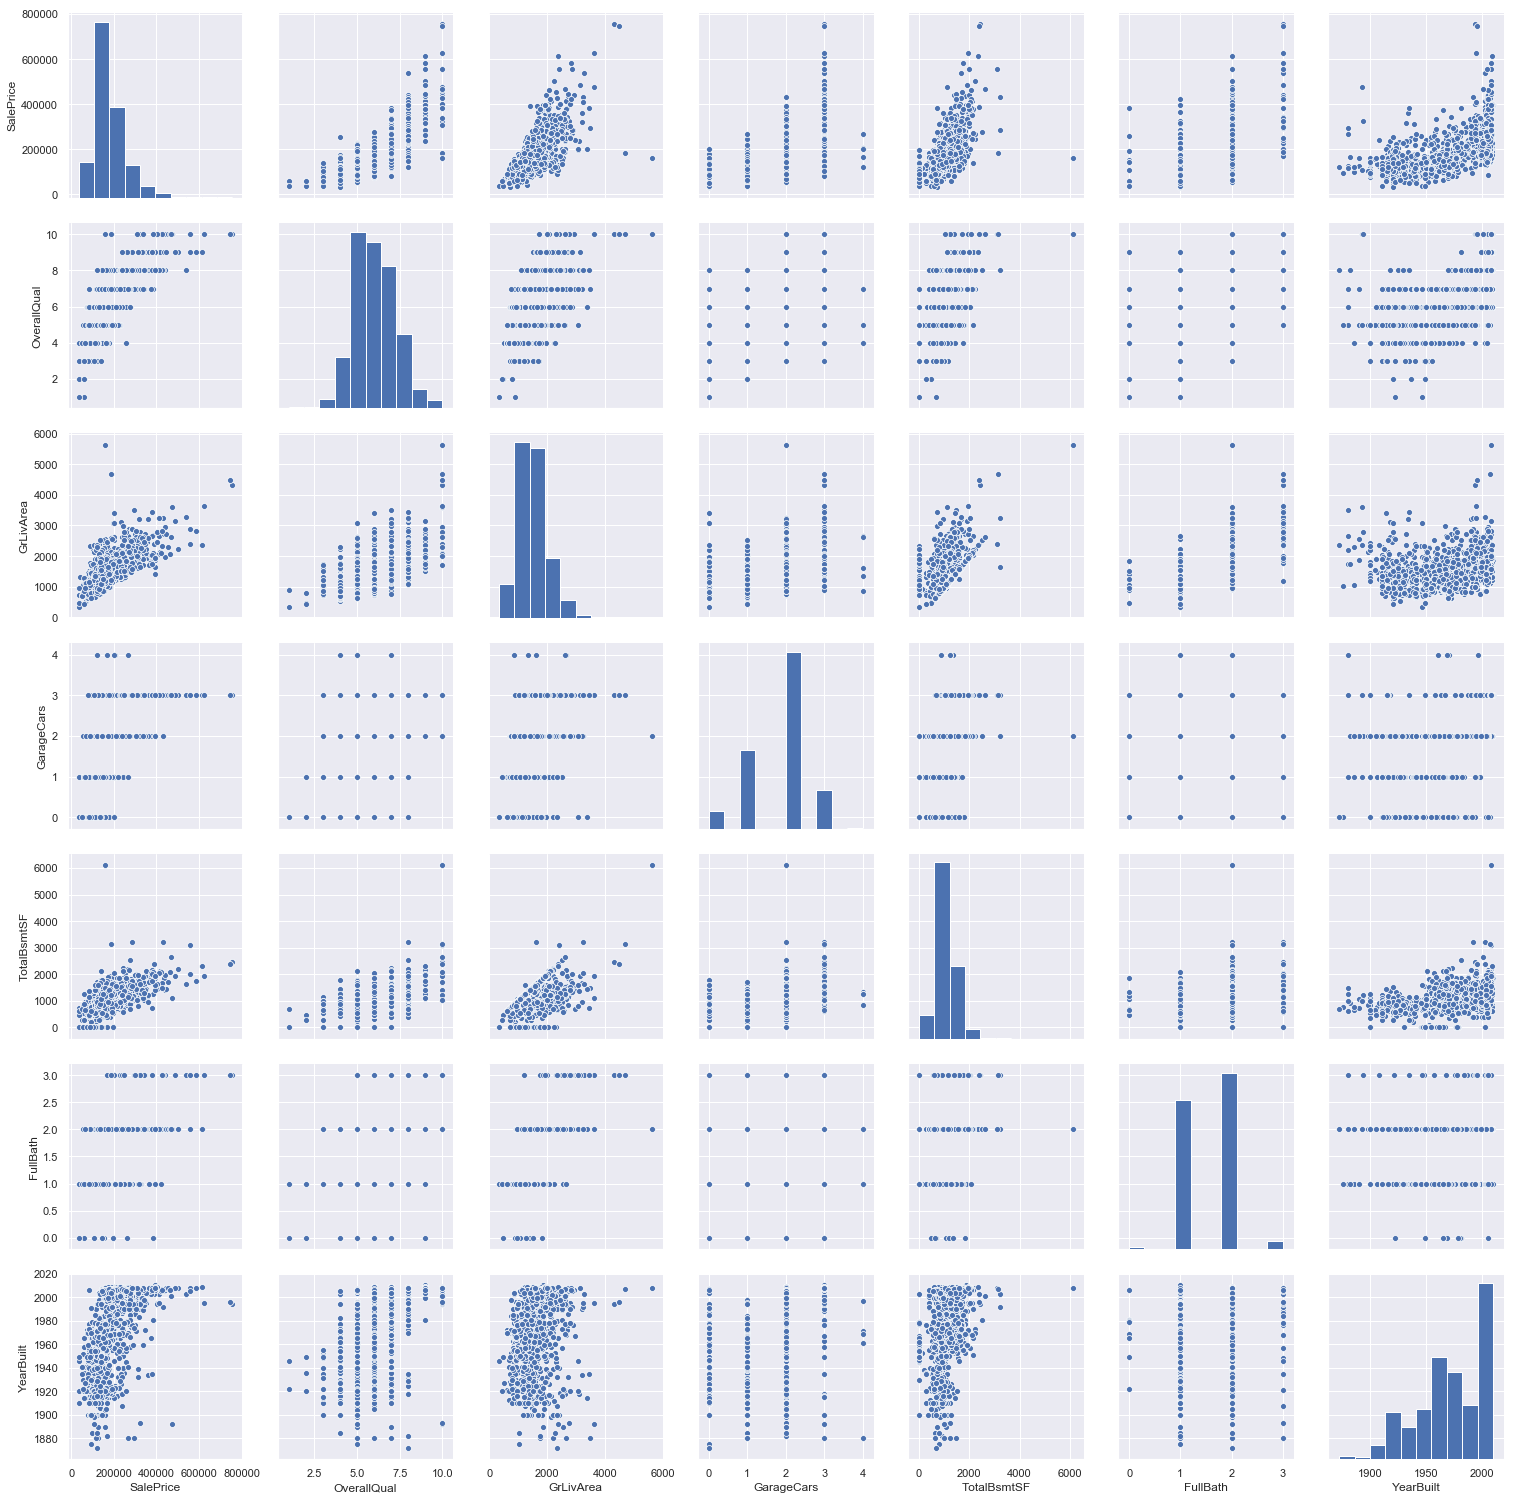

In [10]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols],size=3)
plt.show()

#Distribution of Y variable --> Take a log 
*Assumption biolation

Y~ N(XB,$\sigma^{2}$)

Normality assumption check


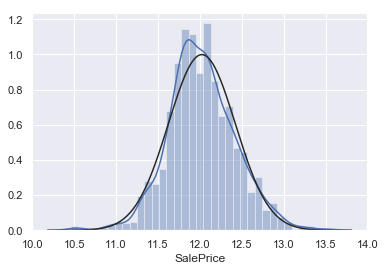

In [11]:
sns.distplot(np.log(train['SalePrice']), fit=norm)

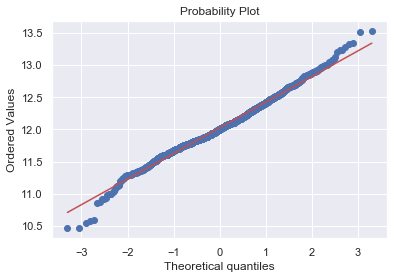

In [12]:
## QQ plot to check Normality assumption

res=stats.probplot(np.log(train['SalePrice']), plot=plt)

* Explain why noramlity assumtpion is requried

### Feature Engineering

[2] A lot of effort in Feature Engineering is needed for this problem. There are many missing observations for the train and test dataset so we imputed by using some trics. We encoded categorical variables. After plotting the dataset that we realized that the relationship between X*Y is not just linear regression. We created seperate Python file to avoid this report lengthy 

* Jason Zhao 

In [15]:
# read test data and training data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Drop Id, since it is not relevant to the selling price.

In [16]:
train_data.drop('Id',axis=1,inplace=True)

Take log of the sales price

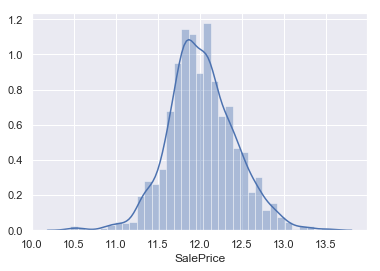

In [17]:
train_data.SalePrice = np.log1p(train_data.SalePrice)

sns.distplot(train_data['SalePrice']);

Check missing values.

In [18]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Based on data description file, we find out most of them are missing is because that house does not have that. Therefore, we will replace those by None

In [19]:
# PoolQC with NaN means no pool, so we put None instead
train_data.PoolQC = train_data.PoolQC.fillna("None")
test_data.PoolQC = test_data.PoolQC.fillna("None")

In [20]:
# MiscFeature: Miscellaneous feature not covered in other categories
# NA means None, so we repaced with None
train_data.MiscFeature = train_data.MiscFeature.fillna("None")
test_data.MiscFeature = test_data.MiscFeature.fillna("None")

In [21]:
# If Alley is NA means there is no Alley access, so we change it to None
train_data.Alley = train_data.Alley.fillna("None")
test_data.Alley = test_data.Alley.fillna("None")

In [22]:
# If Fence is NA means there is no Fence
train_data.Fence = train_data.Fence.fillna("None")
test_data.Fence = test_data.Fence.fillna("None")

In [23]:
# If FireplaceQu is NA means there is no Fireplace
train_data.FireplaceQu = train_data.FireplaceQu.fillna("None")
test_data.FireplaceQu = test_data.FireplaceQu.fillna("None")

In [24]:
# If the house does not have a garage, GarageType GarageFinish GarageQual and GarageCond will be Na
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [25]:
# If there is no basement, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual will be Na,
for column in ("BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [26]:
# Masonry veneer type
train_data.MasVnrType = train_data.MasVnrType.fillna("None")
test_data.MasVnrType = test_data.MasVnrType.fillna("None")

In [27]:
# since there is no garage, so we will set the year build at 0
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

# for testing data, GarageArea and GarageCars also has missing vlaue, we set them to 0 because they does not have garage
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.GarageCars = test_data.GarageCars.fillna(0)

In [28]:
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data['MasVnrArea'].fillna(0)

In [29]:
test_data["TotalBsmtSF"] = test_data['TotalBsmtSF'].fillna(0)
test_data["BsmtFinSF1"] = test_data['BsmtFinSF1'].fillna(0)
test_data["BsmtFinSF2"] = test_data['BsmtFinSF2'].fillna(0)
test_data["BsmtUnfSF"] = test_data['BsmtUnfSF'].fillna(0)

After replacing, we check which data are still missing.

In [30]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
Electrical,0.068493


We want to encode every string data to check correlations.

In [31]:
list(train_data.select_dtypes(exclude=['int', 'float']).columns.values)

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'Po

In [32]:
train_data.MSZoning = train_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})
test_data.MSZoning = test_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [33]:
train_data.Street = train_data.Street.map({'Grvl' : 1, 'Pave' : 2})
test_data.Street = test_data.Street.map({'Grvl' : 1, 'Pave' : 2})

In [34]:
train_data.Alley = train_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})
test_data.Alley = test_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})

In [35]:
train_data.LotShape = train_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})
test_data.LotShape = test_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})

In [36]:
train_data.LandContour = train_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})
test_data.LandContour = test_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})

In [37]:
train_data.Utilities = train_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})
test_data.Utilities = test_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})

In [38]:
train_data.LotConfig = train_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})
test_data.LotConfig = test_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})

In [39]:
train_data.LandSlope = train_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})
test_data.LandSlope = test_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})

In [40]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1

In [41]:
train_data.Neighborhood = train_data.Neighborhood.map(NeighborhoodMap)
test_data.Neighborhood = test_data.Neighborhood.map(NeighborhoodMap)

In [42]:
ConditionMap = {'Norm': 3, 'Feedr': 4, 'PosN': 2, 'Artery': 4, 'RRAe': 1, 'RRNn': 1, 'RRAn': 1, 'PosA': 2, 'RRNe': 1}

train_data.Condition1 = train_data.Condition1.map(ConditionMap)
train_data.Condition2 = train_data.Condition2.map(ConditionMap)
test_data.Condition1 = test_data.Condition1.map(ConditionMap)
test_data.Condition2 = test_data.Condition2.map(ConditionMap)

In [43]:
train_data.BldgType = train_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})
test_data.BldgType = test_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})

In [44]:
train_data.HouseStyle = train_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})
test_data.HouseStyle = test_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})

In [45]:
train_data.RoofStyle = train_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})
test_data.RoofStyle = test_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})

In [46]:
train_data.RoofMatl = train_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})
test_data.RoofMatl = test_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})

In [47]:
ExteriorMap = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15}
train_data.Exterior1st = train_data.Exterior1st.map(ExteriorMap)
train_data.Exterior2nd = train_data.Exterior2nd.map(ExteriorMap)
test_data.Exterior1st = test_data.Exterior1st.map(ExteriorMap)
test_data.Exterior2nd = test_data.Exterior2nd.map(ExteriorMap)

In [48]:
# since has none, so we just samplify this featrue
train_data.MasVnrType = train_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
test_data.MasVnrType = test_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})

In [49]:
conditionMap = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}

In [50]:
train_data.ExterCond = train_data.ExterCond.map(conditionMap)
test_data.ExterCond = test_data.ExterCond.map(conditionMap)
train_data.ExterQual = train_data.ExterQual.map(conditionMap)
test_data.ExterQual = test_data.ExterQual.map(conditionMap)
train_data.BsmtQual = train_data.BsmtQual.map(conditionMap)
test_data.BsmtQual = test_data.BsmtQual.map(conditionMap)
train_data.BsmtCond = train_data.BsmtCond.map(conditionMap)
test_data.BsmtCond = test_data.BsmtCond.map(conditionMap)
train_data.HeatingQC = train_data.HeatingQC.map(conditionMap)
test_data.HeatingQC = test_data.HeatingQC.map(conditionMap)
train_data.KitchenQual = train_data.KitchenQual.map(conditionMap)
test_data.KitchenQual = test_data.KitchenQual.map(conditionMap)
train_data.FireplaceQu = train_data.FireplaceQu.map(conditionMap)
test_data.FireplaceQu = test_data.FireplaceQu.map(conditionMap)
train_data.GarageQual = train_data.GarageQual.map(conditionMap)
test_data.GarageQual = test_data.GarageQual.map(conditionMap)
train_data.GarageCond = train_data.GarageCond.map(conditionMap)
test_data.GarageCond = test_data.GarageCond.map(conditionMap)
train_data.PoolQC = train_data.PoolQC.map(conditionMap)
test_data.PoolQC = test_data.PoolQC.map(conditionMap)


In [51]:
train_data.Foundation = train_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})
test_data.Foundation = test_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})

In [52]:
train_data.BsmtExposure = train_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})
test_data.BsmtExposure = test_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})

In [53]:
BsmtFinTypeMap = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [54]:
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(BsmtFinTypeMap)
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(BsmtFinTypeMap)
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(BsmtFinTypeMap)
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(BsmtFinTypeMap)

In [55]:
train_data.Heating = train_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})
test_data.Heating = test_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

In [56]:
train_data.CentralAir = train_data.CentralAir.map({'Y': 1, 'N': 0})
test_data.CentralAir = test_data.CentralAir.map({'Y': 1, 'N': 0})

In [57]:
train_data.Electrical = train_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})
test_data.Electrical = test_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})

In [58]:
train_data.Functional = train_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})
test_data.Functional = test_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})

In [59]:
train_data.GarageType = train_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})
test_data.GarageType = test_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})

In [60]:
train_data.GarageFinish = train_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})
test_data.GarageFinish = test_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})

In [61]:
train_data.PavedDrive = train_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})
test_data.PavedDrive = test_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})

In [62]:
train_data.Fence = train_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
test_data.Fence = test_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})

In [63]:
train_data.MiscFeature = train_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})
test_data.MiscFeature = test_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})

In [64]:
train_data.SaleType = train_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})
test_data.SaleType = test_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})

In [65]:
train_data.SaleCondition = train_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})
test_data.SaleCondition = test_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

After enconding, all of features' datatype has became int or float.

We tried to inpute those missing value, but after inpute, all datatype has bcame float which cause more problem, so we just chose to fill those data by mean value.

In [66]:
# train_data=train_data.fillna(train_data.median())
# test_data=test_data.fillna(test_data.median())

In [69]:
correlated = train_data.corr()
correlated = correlated.loc['SalePrice']
correlated = correlated.sort_values(ascending=False)

print(correlated.head(15))



SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
ExterQual       0.678840
KitchenQual     0.667893
GarageArea      0.650888
BsmtQual        0.615804
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
FireplaceQu     0.546362
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
11       9
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
29       4
        ..
1430     5
1431     6
1432     4
1433     6
1434     5
1435     6
1436     4
1437     8
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1453     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1460, dtype: int64

In [64]:
from sklearn import linear_model

In [67]:

dfImpute = train_data.loc[:, ['1stFlrSF', 'LotArea', 'LotArea_log', 'LotFrontage']].copy()
testIx = dfImpute.loc[:,'LotFrontage'].isnull()

In [133]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
BldgType,8.630137
Exterior2nd,7.260274
GarageType,1.301370
Electrical,0.068493


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
import itertools
import xgboost as xgb


In [128]:
## Try different feature engineering with our model

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

warnings.simplefilter('ignore', np.RankWarning)

x = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotArea"]
y = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotFrontage"]

t = (x <= 25000) & (y <= 150)

p = np.polyfit(x[t], y[t], 1)

all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])

all_data = all_data.fillna({
    'Alley' : 'NoAlley',
    'MasVnrType': 'None',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'BsmtQual' : 'NoBsmt',
    'BsmtCond' : 'NoBsmt',
    'BsmtExposure' : 'NoBsmt',
    'BsmtFinType1' : 'NoBsmt',
    'BsmtFinType2' : 'NoBsmt',
    'KitchenQual' : 'TA',
    'MSZoning' : 'RL',
    'Utilities' : 'AllPub',
    'Exterior1st' : 'VinylSd',
    'Exterior2nd'   : 'VinylSd',
    'Functional' : 'Typ',
    'PoolQC' : 'NoPool',
    'Fence' : 'NoFence',
    'MiscFeature' : 'None',
    'Electrical' : 'SBrkr'

})

#all_data.loc[all_data.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'

#all_data.loc[all_data.SaleCondition.isnull(), 'SaleType'] = 'WD'

all_data.loc[all_data.MasVnrType == 'None', 'MasVnrArea'] = 0

all_data.loc[all_data.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0

all_data.loc[all_data.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0

#all_data.loc[all_data.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = all_data.BsmtFinSF1.median()

all_data.loc[all_data.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0

#all_data.loc[all_data.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = all_data.BsmtUnfSF.median()

all_data.loc[all_data.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0

#all_data.loc[all_data['GarageArea'].isnull(), 'GarageArea'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageArea'].mean()

#all_data.loc[all_data['GarageCars'].isnull(), 'GarageCars'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageCars'].median()

all_data = all_data.replace({'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},

                             'Street': {'Pave': 1, 'Grvl': 0 },

                             'FireplaceQu': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoFireplace': 0

                                            },

                             'Fence': {'GdPrv': 2,

                                       'GdWo': 2,

                                       'MnPrv': 1,

                                       'MnWw': 1,

                                       'NoFence': 0},

                             'ExterQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1

                                            },

                             'ExterCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1

                                            },

                             'BsmtQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoBsmt': 0},

                             'BsmtExposure': {'Gd': 3,

                                            'Av': 2,

                                            'Mn': 1,

                                            'No': 0,

                                            'NoBsmt': 0},

                             'BsmtCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoBsmt': 0},

                             'GarageQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoGarage': 0},

                             'GarageCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoGarage': 0},

                             'KitchenQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1},

                             'Functional': {'Typ': 0,

                                            'Min1': 1,

                                            'Min2': 1,

                                            'Mod': 2,

                                            'Maj1': 3,

                                            'Maj2': 4,

                                            'Sev': 5,

                                            'Sal': 6},

                             'CentralAir': {'Y': 1,

                                            'N': 0},
                            
                              'PavedDrive': {'Y': 1,

                                            'P': 0,

                                            'N': 0}
                            
                            })


newer_dwelling = all_data.MSSubClass.replace({20: 1,

                                            30: 0,

                                            40: 0,

                                            45: 0,

                                            50: 0,

                                            60: 1,

                                            70: 0,

                                            75: 0,

                                            80: 0,

                                            85: 0,

                                            90: 0,

                                           120: 1,

                                           150: 0,

                                           160: 0,

                                           180: 0,

                                           190: 0})

newer_dwelling.name = 'newer_dwelling'

all_data = all_data.replace({'MSSubClass': {20: 'SubClass_20',

                                            30: 'SubClass_30',

                                            40: 'SubClass_40',

                                            45: 'SubClass_45',

                                            50: 'SubClass_50',

                                            60: 'SubClass_60',

                                            70: 'SubClass_70',

                                            75: 'SubClass_75',

                                            80: 'SubClass_80',

                                            85: 'SubClass_85',

                                            90: 'SubClass_90',

                                           120: 'SubClass_120',

                                           150: 'SubClass_150',

                                           160: 'SubClass_160',

                                           180: 'SubClass_180',

                                           190: 'SubClass_190'}})

overall_poor_qu = all_data.OverallQual.copy()

overall_poor_qu = 5 - overall_poor_qu

overall_poor_qu[overall_poor_qu<0] = 0

overall_poor_qu.name = 'overall_poor_qu'

overall_good_qu = all_data.OverallQual.copy()

overall_good_qu = overall_good_qu - 5

overall_good_qu[overall_good_qu<0] = 0

overall_good_qu.name = 'overall_good_qu'

overall_poor_cond = all_data.OverallCond.copy()

overall_poor_cond = 5 - overall_poor_cond

overall_poor_cond[overall_poor_cond<0] = 0

overall_poor_cond.name = 'overall_poor_cond'

overall_good_cond = all_data.OverallCond.copy()

overall_good_cond = overall_good_cond - 5

overall_good_cond[overall_good_cond<0] = 0

overall_good_cond.name = 'overall_good_cond'

exter_poor_qu = all_data.ExterQual.copy()

exter_poor_qu[exter_poor_qu<3] = 1

exter_poor_qu[exter_poor_qu>=3] = 0

exter_poor_qu.name = 'exter_poor_qu'

exter_good_qu = all_data.ExterQual.copy()

exter_good_qu[exter_good_qu<=3] = 0

exter_good_qu[exter_good_qu>3] = 1

exter_good_qu.name = 'exter_good_qu'

exter_poor_cond = all_data.ExterCond.copy()

exter_poor_cond[exter_poor_cond<3] = 1

exter_poor_cond[exter_poor_cond>=3] = 0

exter_poor_cond.name = 'exter_poor_cond'

exter_good_cond = all_data.ExterCond.copy()

exter_good_cond[exter_good_cond<=3] = 0

exter_good_cond[exter_good_cond>3] = 1

exter_good_cond.name = 'exter_good_cond'

bsmt_poor_cond = all_data.BsmtCond.copy()

bsmt_poor_cond[bsmt_poor_cond<3] = 1

bsmt_poor_cond[bsmt_poor_cond>=3] = 0

bsmt_poor_cond.name = 'bsmt_poor_cond'

bsmt_good_cond = all_data.BsmtCond.copy()

bsmt_good_cond[bsmt_good_cond<=3] = 0

bsmt_good_cond[bsmt_good_cond>3] = 1

bsmt_good_cond.name = 'bsmt_good_cond'

garage_poor_qu = all_data.GarageQual.copy()

garage_poor_qu[garage_poor_qu<3] = 1

garage_poor_qu[garage_poor_qu>=3] = 0

garage_poor_qu.name = 'garage_poor_qu'

garage_good_qu = all_data.GarageQual.copy()

garage_good_qu[garage_good_qu<=3] = 0

garage_good_qu[garage_good_qu>3] = 1

garage_good_qu.name = 'garage_good_qu'

garage_poor_cond = all_data.GarageCond.copy()

garage_poor_cond[garage_poor_cond<3] = 1

garage_poor_cond[garage_poor_cond>=3] = 0

garage_poor_cond.name = 'garage_poor_cond'

garage_good_cond = all_data.GarageCond.copy()

garage_good_cond[garage_good_cond<=3] = 0

garage_good_cond[garage_good_cond>3] = 1

garage_good_cond.name = 'garage_good_cond'

kitchen_poor_qu = all_data.KitchenQual.copy()

kitchen_poor_qu[kitchen_poor_qu<3] = 1

kitchen_poor_qu[kitchen_poor_qu>=3] = 0

kitchen_poor_qu.name = 'kitchen_poor_qu'

kitchen_good_qu = all_data.KitchenQual.copy()

kitchen_good_qu[kitchen_good_qu<=3] = 0

kitchen_good_qu[kitchen_good_qu>3] = 1

kitchen_good_qu.name = 'kitchen_good_qu'

qu_list = pd.concat((overall_poor_qu, overall_good_qu, overall_poor_cond, overall_good_cond, exter_poor_qu,

                     exter_good_qu, exter_poor_cond, exter_good_cond, bsmt_poor_cond, bsmt_good_cond, garage_poor_qu,

                     garage_good_qu, garage_poor_cond, garage_good_cond, kitchen_poor_qu, kitchen_good_qu), axis=1)

bad_heating = all_data.HeatingQC.replace({'Ex': 0,

                                          'Gd': 0,

                                          'TA': 0,

                                          'Fa': 1,

                                          'Po': 1})

bad_heating.name = 'bad_heating'

MasVnrType_Any = all_data.MasVnrType.replace({'BrkCmn': 1,

                                              'BrkFace': 1,

                                              'CBlock': 1,

                                              'Stone': 1,

                                              'None': 0})

MasVnrType_Any.name = 'MasVnrType_Any'

SaleCondition_PriceDown = all_data.SaleCondition.replace({'Abnorml': 1,

                                                          'Alloca': 1,

                                                          'AdjLand': 1,

                                                          'Family': 1,

                                                          'Normal': 0,

                                                          'Partial': 0})

SaleCondition_PriceDown.name = 'SaleCondition_PriceDown'

Neighborhood_Good = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Neighborhood_Good'])

Neighborhood_Good[all_data.Neighborhood=='NridgHt'] = 1

Neighborhood_Good[all_data.Neighborhood=='Crawfor'] = 1

Neighborhood_Good[all_data.Neighborhood=='StoneBr'] = 1

Neighborhood_Good[all_data.Neighborhood=='Somerst'] = 1

Neighborhood_Good[all_data.Neighborhood=='NoRidge'] = 1

from sklearn.svm import SVC

svm = SVC(C=100, gamma=0.0001, kernel='rbf')

pc = pd.Series(np.zeros(train.shape[0]))

pc[:] = 'pc1'

pc[train.SalePrice >= 150000] = 'pc2'

pc[train.SalePrice >= 220000] = 'pc3'

columns_for_pc = ['Exterior1st', 'Exterior2nd', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType']

X_t = pd.get_dummies(train.loc[:, columns_for_pc], sparse=True)

svm.fit(X_t, pc) #Training

pc_pred = svm.predict(X_t)

p = train.SalePrice/100000

price_category = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['pc'])

X_t = pd.get_dummies(all_data.loc[:, columns_for_pc], sparse=True)

pc_pred = svm.predict(X_t)

price_category[pc_pred=='pc2'] = 1

price_category[pc_pred=='pc3'] = 2

price_category = price_category.to_sparse()

season = all_data.MoSold.replace( {1: 0,

                                   2: 0,

                                   3: 0,

                                   4: 1,

                                   5: 1,

                                   6: 1,

                                   7: 1,

                                   8: 0,

                                   9: 0,

                                  10: 0,

                                  11: 0,

                                  12: 0})

season.name = 'season'

all_data = all_data.replace({'MoSold': {1: 'Yan',

                                        2: 'Feb',

                                        3: 'Mar',

                                        4: 'Apr',

                                        5: 'May',

                                        6: 'Jun',

                                        7: 'Jul',

                                        8: 'Avg',

                                        9: 'Sep',

                                        10: 'Oct',

                                        11: 'Nov',

                                        12: 'Dec'}})

reconstruct = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Reconstruct'])

reconstruct[all_data.YrSold < all_data.YearRemodAdd] = 1

reconstruct = reconstruct.to_sparse()

recon_after_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['ReconstructAfterBuy'])

recon_after_buy[all_data.YearRemodAdd >= all_data.YrSold] = 1

recon_after_buy = recon_after_buy.to_sparse()

build_eq_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Build.eq.Buy'])

build_eq_buy[all_data.YearBuilt >= all_data.YrSold] = 1

build_eq_buy = build_eq_buy.to_sparse()

all_data.YrSold = 2010 - all_data.YrSold

year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

all_data.GarageYrBlt = all_data.GarageYrBlt.map(year_map)

all_data.loc[all_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'NoGarage'

all_data.YearBuilt = all_data.YearBuilt.map(year_map)

all_data.YearRemodAdd = all_data.YearRemodAdd.map(year_map)

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

t = all_data[numeric_feats].quantile(.75)

use_75_scater = t[t != 0].index

all_data[use_75_scater] = all_data[use_75_scater]/all_data[use_75_scater].quantile(.75)

t = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',

     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',

     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

all_data.loc[:, t] = np.log1p(all_data.loc[:, t])

train["SalePrice"] = np.log1p(train["SalePrice"])

X = pd.get_dummies(all_data)

X = X.fillna(X.mean())

X = X.drop('RoofMatl_ClyTile', axis=1)

X = X.drop('Condition2_PosN', axis=1)

X = X.drop('MSZoning_C (all)', axis=1)

X = X.drop('MSSubClass_SubClass_160', axis=1)

X = pd.concat((X, newer_dwelling, season, reconstruct, recon_after_buy,

               qu_list, bad_heating, MasVnrType_Any, price_category, build_eq_buy), axis=1)

from itertools import product, chain

def poly(X):

    areas = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BsmtUnfSF']

    t = chain(qu_list.axes[1].get_values(),

              ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond',

               'KitchenQual', 'HeatingQC', 'bad_heating', 'MasVnrType_Any', 'SaleCondition_PriceDown', 'Reconstruct',

               'ReconstructAfterBuy', 'Build.eq.Buy'])

    for a, t in product(areas, t):

        x = X.loc[:, [a, t]].prod(1)

        x.name = a + '_' + t

        yield x

XP = pd.concat(poly(X), axis=1)

X = pd.concat((X, XP), axis=1)

train_X = X[:train.shape[0]]

test_X = X[train.shape[0]:]

y = train.SalePrice

outliers_id = np.array([523,1298])
##Remove outliers
train_X = X_train.drop(outliers_id)

y = y.drop(outliers_id)




KeyError: '[ 523 1298] not found in axis'

(1458, 466)

In [ ]:

##Temporarlily model fitting


clf1 = Lasso(alpha = 0.0002)

clf1.fit(X_train, y)

lasso_preds = np.expm1(clf1.predict(X_test))

#ELASTIC NET

clf2 = ElasticNet(alpha=0.0004, l1_ratio=1.2)

clf2.fit(X_train, y)

elas_preds = np.expm1(clf2.predict(X_test))

#XGBOOST

clf3=xgb.XGBRegressor(colsample_bytree=0.4,

                 gamma=0.045,

                 learning_rate=0.07,

                 max_depth=10,

                 min_child_weight=1.5,

                 n_estimators=300,

                 reg_alpha=0.65,

                 reg_lambda=0.45,

                 subsample=0.95)



clf3.fit(X_train, y)

xgb_preds = np.expm1(clf3.predict(X_test))

### Modeling

[3] Firstly, we fitted Regularized Linear model by using Ridge regression (L2) Regularization and checked it's performance. And tried to apply Elastic net which is ensenble model of L1(Lasso) regression with L2. After fitting this regression file, we also used Neural Network based model by using Pytorch
Firt trial, Second trial, Third Trial.. Feature engineering again, Grid search

In [93]:
# Import needed libaries
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

In [71]:
#Get labels by select SalePrice
y_log=train_data['SalePrice']
train_data.drop('SalePrice',axis=1,inplace=True)

In [95]:
from sklearn.model_selection import cross_val_score, train_test_split

In [129]:
# Partition the dataset in test + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
#Define 70% is used as testing data and 30% is test dataset.

X_train : (1022, 466)
X_test : (438, 466)
y_train : (1022,)
y_test : (438,)


### Lasso regression

In [210]:

clf1 = Lasso(alpha = 0.0002)
clf1.fit(X_train, y_train)

lasso_preds = np.expm1(clf1.predict(test_X))


## xgboost

In [135]:
import xgboost

In [148]:
# Create an xgboost model with leaning rate 0.05


                 
model_xgb = xgboost.XGBRegressor( colsample_bytree=0.4,gamma=0.045,n_estimators=2000, learning_rate=0.02,subsample=0.95,reg_alpha=0.65,reg_lambda=0.45) 

In [149]:
# Training
model_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:11.3045
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:11.0788
[2]	validation_0-rmse:10.8578
[3]	validation_0-rmse:10.6412
[4]	validation_0-rmse:10.4289
[5]	validation_0-rmse:10.2208
[6]	validation_0-rmse:10.0168
[7]	validation_0-rmse:9.81688
[8]	validation_0-rmse:9.62099
[9]	validation_0-rmse:9.42891
[10]	validation_0-rmse:9.24054
[11]	validation_0-rmse:9.05596
[12]	validation_0-rmse:8.87503
[13]	validation_0-rmse:8.69808
[14]	validation_0-rmse:8.52445
[15]	validation_0-rmse:8.35417
[16]	validation_0-rmse:8.18734
[17]	validation_0-rmse:8.02394
[18]	validation_0-rmse:7.86397
[19]	validation_0-rmse:7.70704
[20]	validation_0-rmse:7.5532
[21]	validation_0-rmse:7.40234
[22]	validation_0-rmse:7.25463
[23]	validation_0-rmse:7.10996
[24]	validation_0-rmse:6.96815
[25]	validation_0-rmse:6.829
[26]	validation_0-rmse:6.69276
[27]	validation_0-rmse:6.55923
[28]	validation_0-rmse:6.42842
[29]	validation_0-rmse:6.30026
[30]	validation_0-

[255]	validation_0-rmse:0.154075
[256]	validation_0-rmse:0.153374
[257]	validation_0-rmse:0.152667
[258]	validation_0-rmse:0.152082
[259]	validation_0-rmse:0.151456
[260]	validation_0-rmse:0.150828
[261]	validation_0-rmse:0.150225
[262]	validation_0-rmse:0.149624
[263]	validation_0-rmse:0.149045
[264]	validation_0-rmse:0.148595
[265]	validation_0-rmse:0.148085
[266]	validation_0-rmse:0.147552
[267]	validation_0-rmse:0.147033
[268]	validation_0-rmse:0.146539
[269]	validation_0-rmse:0.146066
[270]	validation_0-rmse:0.145698
[271]	validation_0-rmse:0.145254
[272]	validation_0-rmse:0.144855
[273]	validation_0-rmse:0.144512
[274]	validation_0-rmse:0.144155
[275]	validation_0-rmse:0.143805
[276]	validation_0-rmse:0.143497
[277]	validation_0-rmse:0.14314
[278]	validation_0-rmse:0.142758
[279]	validation_0-rmse:0.142426
[280]	validation_0-rmse:0.142083
[281]	validation_0-rmse:0.141807
[282]	validation_0-rmse:0.141473
[283]	validation_0-rmse:0.141157
[284]	validation_0-rmse:0.140919
[285]	valid

[505]	validation_0-rmse:0.130177
[506]	validation_0-rmse:0.130177
[507]	validation_0-rmse:0.130154
[508]	validation_0-rmse:0.130154
[509]	validation_0-rmse:0.130167
[510]	validation_0-rmse:0.130167
[511]	validation_0-rmse:0.130161
[512]	validation_0-rmse:0.13016
[513]	validation_0-rmse:0.130173
[514]	validation_0-rmse:0.130173
[515]	validation_0-rmse:0.13015
[516]	validation_0-rmse:0.13015
[517]	validation_0-rmse:0.13015
[518]	validation_0-rmse:0.130131
[519]	validation_0-rmse:0.130071
[520]	validation_0-rmse:0.130071
[521]	validation_0-rmse:0.1301
[522]	validation_0-rmse:0.1301
[523]	validation_0-rmse:0.1301
[524]	validation_0-rmse:0.1301
[525]	validation_0-rmse:0.130073
[526]	validation_0-rmse:0.130073
[527]	validation_0-rmse:0.130055
[528]	validation_0-rmse:0.130055
[529]	validation_0-rmse:0.130012
[530]	validation_0-rmse:0.13
[531]	validation_0-rmse:0.13
[532]	validation_0-rmse:0.12999
[533]	validation_0-rmse:0.12999
[534]	validation_0-rmse:0.129987
[535]	validation_0-rmse:0.129974

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.045, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.65, reg_lambda=0.45, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.95)

In [99]:
y_test_xgb_ela = model_xgb.predict(X_test)

### Keras

In [105]:
import keras

In [106]:
seed = 7
np.random.seed(seed)

In [107]:
# Create a model and add layers
kerasModel = keras.models.Sequential()

kerasModel.add(keras.layers.Dense(500, input_dim = X_train.shape[1],activation='relu'))
kerasModel.add(keras.layers.Dense(400,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(12,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(6,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(12,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(6,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(3,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(1,kernel_initializer='normal'))
kerasModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               233500    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               15300     
__________

## Number of layer searching method ==> Grid search can be used 

In [108]:
# Define another loss function
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [109]:
# Set loss function and optimizer
kerasModel.compile(loss = 'mse', optimizer = "adam")

In [110]:
# Set callback function which will ealystop when val_loss does not become better in 50 epochs
# save the best model
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
            keras.callbacks.ModelCheckpoint('best.h5', monitor='val_loss', save_best_only=True, mode='min')]

In [112]:
## Train
history = kerasModel.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test))

Train on 1020 samples, validate on 438 samples
Epoch 1/200
1020/1020 [==============================] - 1s 753us/step - loss: 0.0843 - val_loss: 0.0490
Epoch 2/200
1020/1020 [==============================] - 1s 850us/step - loss: 0.0778 - val_loss: 0.0284
Epoch 3/200
1020/1020 [==============================] - 1s 867us/step - loss: 0.0097 - val_loss: 0.0788
Epoch 4/200
1020/1020 [==============================] - 1s 811us/step - loss: 0.0121 - val_loss: 0.0656
Epoch 5/200
1020/1020 [==============================] - 1s 828us/step - loss: 0.0205 - val_loss: 0.0245
Epoch 6/200
1020/1020 [==============================] - 1s 770us/step - loss: 0.0024 - val_loss: 0.0236
Epoch 7/200
1020/1020 [==============================] - 1s 814us/step - loss: 0.0094 - val_loss: 0.0282
Epoch 8/200
1020/1020 [==============================] - 1s 771us/step - loss: 0.0100 - val_loss: 0.0244
Epoch 9/200
1020/1020 [==============================] - 1s 795us/step - loss: 0.0256 - val_loss: 0.0899
Epoch 10

Epoch 78/200
1020/1020 [==============================] - 1s 956us/step - loss: 0.0137 - val_loss: 0.0280
Epoch 79/200
1020/1020 [==============================] - 1s 707us/step - loss: 0.0253 - val_loss: 0.0283
Epoch 80/200
1020/1020 [==============================] - 1s 771us/step - loss: 0.0220 - val_loss: 0.0253
Epoch 81/200
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0575 - val_loss: 0.0278
Epoch 82/200
1020/1020 [==============================] - 1s 793us/step - loss: 0.0435 - val_loss: 0.0430
Epoch 83/200
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0293 - val_loss: 0.0542
Epoch 84/200
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0334 - val_loss: 0.0336
Epoch 85/200
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0337 - val_loss: 0.0310
Epoch 86/200
1020/1020 [==============================] - 1s 963us/step - loss: 0.0349 - val_loss: 0.0510
Epoch 87/200
1020/1020 [==============================

1020/1020 [==============================] - 1s 861us/step - loss: 0.0118 - val_loss: 0.0251
Epoch 156/200
1020/1020 [==============================] - 1s 917us/step - loss: 0.0077 - val_loss: 0.0741
Epoch 157/200
1020/1020 [==============================] - 1s 918us/step - loss: 0.0182 - val_loss: 0.0267
Epoch 158/200
1020/1020 [==============================] - 1s 878us/step - loss: 0.0063 - val_loss: 0.0423
Epoch 159/200
1020/1020 [==============================] - 1s 768us/step - loss: 0.0259 - val_loss: 0.1269
Epoch 160/200
1020/1020 [==============================] - 1s 731us/step - loss: 0.0279 - val_loss: 0.0251
Epoch 161/200
1020/1020 [==============================] - 1s 754us/step - loss: 0.0262 - val_loss: 0.0280
Epoch 162/200
1020/1020 [==============================] - 1s 755us/step - loss: 0.0380 - val_loss: 0.1321
Epoch 163/200
1020/1020 [==============================] - 1s 831us/step - loss: 0.0380 - val_loss: 0.0249
Epoch 164/200
1020/1020 [==========================

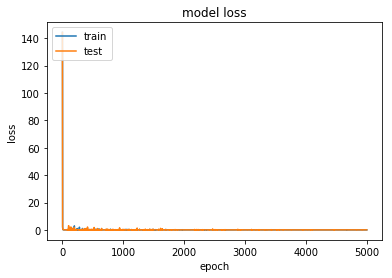

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
np.shape(kerasModel.predict(X_test))


(1459,)

In [179]:
np.shape(test.Id)

kerasModel.predict(X_test)

res=np.expm1(kerasModel.predict(test_X))

In [192]:
np.shape(test['Id'])

(1459,)

In [203]:
solution = pd.DataFrame({"id":test['Id'], "SalePrice":res[:,0]}, columns=['id', 'SalePrice'])
solution.to_csv("result.csv", index = False)


In [212]:
pred_xgb=model_xgb.predict(test_X)
sol=np.expm1(pred_xgb)

solution = pd.DataFrame({"id":test['Id'], "SalePrice":lasso_preds}, columns=['id', 'SalePrice'])
solution.to_csv("result.csv", index = False)


In [211]:
lasso_preds

array([116672.85921358, 164624.28738499, 180802.60358362, ...,
       165492.48298762, 116194.74934614, 215246.94362455])

### Results

[4] The result suggests that ~ shows best performance .... between other method

(-Create table and show the result// Leader bord score.)



### Limitation/Recommendations

[5] Limitations/Recommendations
1. The training data and test dataset have a same length and the performance of the model might be improved that if we can obtain more dataset 

2. We realize that a lot of domain knowledg is requried 

3. Feature enginnering/ other types of model is required


### Conclusion

[6] Fidings from EDA- Which feature was included.. how we engineerined. Model fitting and validity of model tracking down. Our efforts to try to improve the performance. 

### Reference/Resource

[1] https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

[2] https://github.com/Sooyeong/CSE627_project 